<ipython-input-18-e11bcd375a6a>:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series.fillna(method='ffill', inplace=True)  # Forward fill NaNs


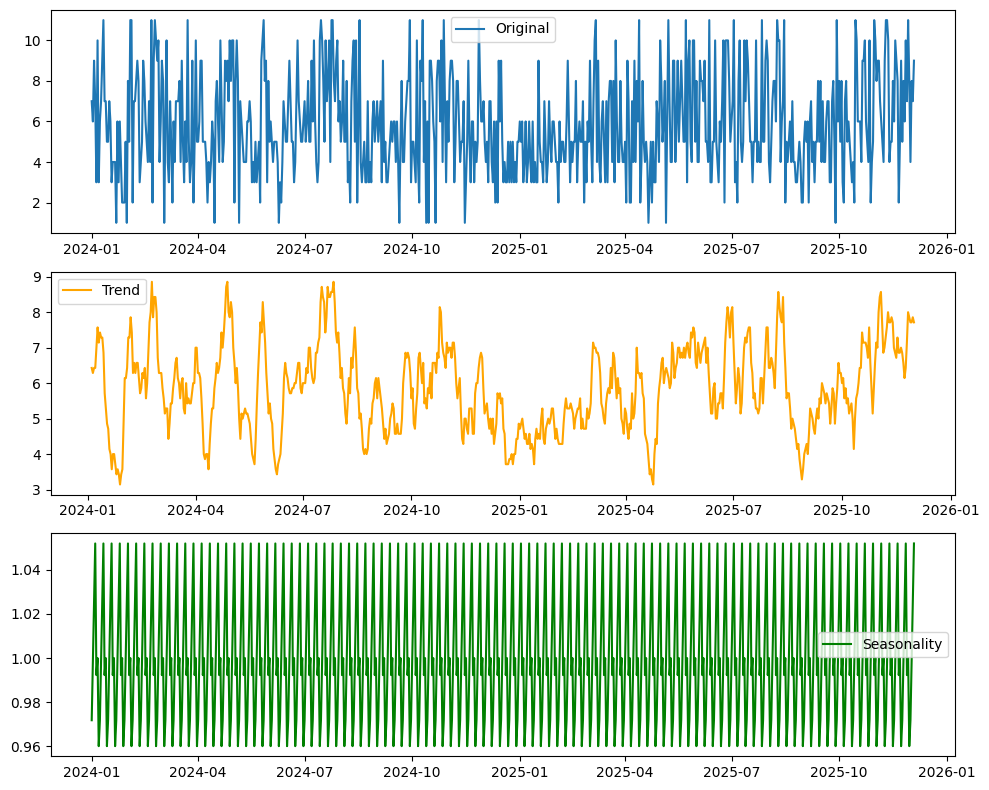

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load dataset
file_path = 'autism_screening.csv'  # Update the filename if needed
df = pd.read_csv(file_path)

# Simulate a time-series index (assuming daily records)
df['Date'] = pd.date_range(start='2024-01-01', periods=len(df), freq='D')
df.set_index('Date', inplace=True)

# Choose the column to analyze (e.g., 'result')
series = df['result']

# Handle missing values
series.fillna(method='ffill', inplace=True)  # Forward fill NaNs

# Ensure enough data for decomposition
period = 7  # Weekly pattern
if len(series) < 2 * period:
    raise ValueError(f"Not enough data: Requires at least {2 * period} observations, but found {len(series)}.")

# ***Before performing seasonal decomposition, shift the series to be positive if it contains zeros or negative values.***
# Check for and handle zero/negative values
if (series <= 0).any():
    # Shift the series to be positive
    min_value = series.min()
    if min_value <= 0:
        series = series + abs(min_value) + 1  # Add 1 to ensure all values are strictly positive

# Perform seasonal decomposition
result = seasonal_decompose(series, model='multiplicative', period=period)

# Plot results
plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 1)
plt.plot(series, label='Original')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(result.trend, label='Trend', color='orange')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(result.seasonal, label='Seasonality', color='green')
plt.legend()

plt.tight_layout()
plt.show()

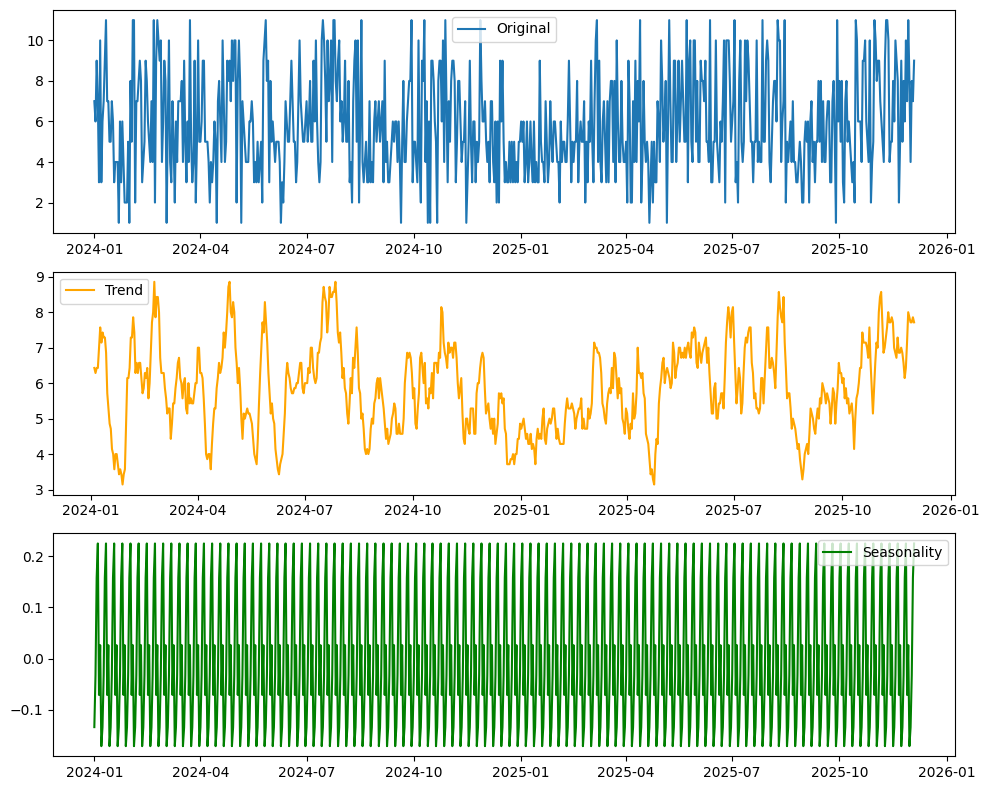

In [19]:
# Perform seasonal decomposition using the 'additive' model
result = seasonal_decompose(series, model='additive', period=period) # Changed to 'additive'

# Plot results
plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 1)
plt.plot(series, label='Original')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(result.trend, label='Trend', color='orange')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(result.seasonal, label='Seasonality', color='green')
plt.legend()

plt.tight_layout()
plt.show()